In [1]:
pip install matplotlib

You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from keras.datasets.cifar10 import load_data
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

import numpy as np
from matplotlib import pyplot as plt
import glob
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)


2022-01-09 04:45:38.421072: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-09 04:45:38.433433: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-09 04:45:38.434411: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [3]:
y=[]
for i in os.listdir('data') :
   y.append('data/'+i) 
trainX = [img_to_array(load_img(x)).astype(int) for x in y]
trainX

[array([[[152, 141, 119],
         [122, 110,  88],
         [148, 133, 110],
         ...,
         [173, 143, 115],
         [221, 196, 165],
         [226, 203, 169]],
 
        [[ 55,  43,  21],
         [ 74,  62,  38],
         [126, 110,  87],
         ...,
         [144, 114,  88],
         [210, 185, 154],
         [189, 166, 132]],
 
        [[ 29,  14,   0],
         [ 86,  70,  47],
         [154, 136, 114],
         ...,
         [118,  86,  63],
         [189, 162, 133],
         [170, 145, 114]],
 
        ...,
 
        [[ 80,  70,  69],
         [ 57,  48,  33],
         [ 93,  86,  40],
         ...,
         [ 24,  15,   8],
         [ 25,  18,  12],
         [ 29,  22,  16]],
 
        [[ 78,  68,  69],
         [ 71,  62,  47],
         [ 99,  92,  46],
         ...,
         [ 52,  43,  36],
         [ 51,  42,  35],
         [ 46,  37,  30]],
 
        [[ 66,  56,  57],
         [ 83,  74,  59],
         [107, 100,  56],
         ...,
         [ 40,  31,  24],
  

In [4]:
trainX = np.array(trainX)

In [5]:
trainX.shape

(175, 64, 64, 3)

In [6]:
data_gen = ImageDataGenerator(
    rotation_range=5,
    width_shift_range=0.1,
    height_shift_range=0.1,
)

In [7]:
arg_iter = data_gen.flow(trainX, batch_size=32)

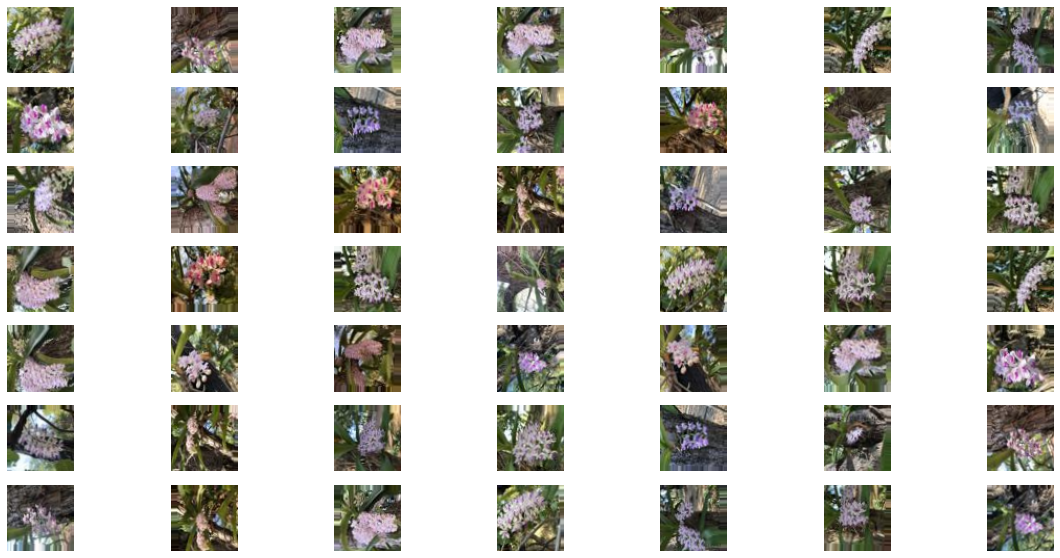

In [8]:
plt.figure(figsize=(20,10))

for i in range(49):
    plt.subplot(7,7,1+i)
    plt.axis('off')
    plt.imshow(next(arg_iter)[0].astype(int))
    
plt.show()

In [9]:
def def_discriminator():
    inputs = keras.Input(shape=(64,64,3))
    
    x = layers.Conv2D(64,3)(inputs)
    x = layers.LeakyReLU(alpha=0.2)(x)
    
    x = layers.Conv2D(128,3, strides=2, padding='same')(x)
    x = layers.LeakyReLU(alpha=0.2)(x)
    
    x = layers.Conv2D(128,3, strides=2, padding='same')(x)
    x = layers.LeakyReLU(alpha=0.2)(x)
    
    x = layers.Conv2D(256,3, strides=2, padding='same')(x)
    x = layers.LeakyReLU(alpha=0.2)(x)
    
    x = layers.Flatten()(x)
    x = layers.Dropout(0.4)(x)
    
    outputs = layers.Dense(1, activation='sigmoid')(x)
    
    model = keras.Model(inputs=inputs, outputs=outputs, name='OrchidGAN_discriminator')
    model.compile(
        loss=keras.losses.BinaryCrossentropy(),
        optimizer=keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
        metrics=['accuracy'],
    )
    return  model

In [10]:
def load_resamples ():
    X = trainX.astype('float32')
    X = (X-127.5)/127.5
    return X

def gen_resamples (n_samples):
    aug_iter = data_gen.flow(trainX, batch_size= n_samples)
    X = next(aug_iter)
    X = (X-127.5)/127.5
    y = np.ones((n_samples,1))
    return X,y
    

In [11]:
gen_resamples(64)

(array([[[[ 9.05882359e-01,  9.37254906e-01,  9.29411769e-01],
          [ 9.05882359e-01,  9.37254906e-01,  9.29411769e-01],
          [ 9.05882359e-01,  9.37254906e-01,  9.29411769e-01],
          ...,
          [-3.33708584e-01, -5.13556376e-02, -5.30162275e-01],
          [-3.63150448e-01, -8.07975009e-02, -5.59228897e-01],
          [-3.72146547e-01, -1.12115599e-01, -5.60784340e-01]],
 
         [[ 9.05882359e-01,  9.37254906e-01,  9.29411769e-01],
          [ 9.05882359e-01,  9.37254906e-01,  9.29411769e-01],
          [ 9.05882359e-01,  9.37254906e-01,  9.29411769e-01],
          ...,
          [-3.33680212e-01, -5.13272770e-02, -5.29758692e-01],
          [-3.64778996e-01, -8.26453716e-02, -5.60784340e-01],
          [-3.71954113e-01, -1.13130577e-01, -5.60189426e-01]],
 
         [[ 9.05882359e-01,  9.37254906e-01,  9.29411769e-01],
          [ 9.05882359e-01,  9.37254906e-01,  9.29411769e-01],
          [ 9.05882359e-01,  9.37254906e-01,  9.29411769e-01],
          ...,
    

In [12]:
def gen_fakeSamples (n_samples):
    X = np.random.rand(64 * 64 * 3 * n_samples)
    X = -1 + X * 2
    X = X.reshape((n_samples, 64, 64, 3))
    y = np.zeros((n_samples, 1))
    return X, y

In [13]:
gen_fakeSamples(32)

(array([[[[-8.12535424e-01, -6.16796503e-01, -2.42735334e-01],
          [ 8.80600042e-01, -9.19115902e-01,  6.37109132e-01],
          [ 6.08074346e-01,  1.96700918e-02, -8.08960796e-01],
          ...,
          [-8.88950481e-01,  9.75344134e-01,  9.05042153e-01],
          [-1.58541438e-01,  4.68848862e-01, -3.08217816e-01],
          [ 8.93294907e-01,  3.33972039e-01,  3.81248498e-01]],
 
         [[-4.61156366e-01, -3.88654978e-01, -5.24064359e-01],
          [ 1.08786928e-03, -6.36928781e-01, -6.37513910e-01],
          [ 7.02254889e-01,  8.49613678e-01,  3.17796816e-01],
          ...,
          [-2.59248983e-02, -9.86563782e-01, -7.67341955e-01],
          [-2.00077815e-02, -2.59568048e-01, -4.26226966e-01],
          [ 3.69980334e-01,  5.47359713e-02, -7.71963283e-01]],
 
         [[ 4.67003038e-01,  2.33782968e-01, -6.41358933e-01],
          [-9.15817703e-01, -6.35432782e-01, -4.36210923e-01],
          [ 3.17503545e-01, -8.06759317e-01,  3.70228036e-01],
          ...,
    

In [14]:
def train_discriminator(model, data_gen, n_iter= 20, n_batch= 128):
    half_batch =int( n_batch / 2 )
    
    for i in range(n_iter):
        X_real, y_real = data_gen(half_batch)
        _, real_acc = model.train_on_batch(X_real,y_real)
        
        X_fake, y_fake =gen_fakeSamples(half_batch)
        _, fake_acc = model.train_on_batch(X_fake, y_fake)
        print('>>> %d real=%.0f%% fake=%.0f%%' % (i+1, real_acc*100, fake_acc*100))
    

In [15]:
d_model = def_discriminator()
d_model.summary()

Model: "OrchidGAN_discriminator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 31, 31, 128)       73856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 31, 31, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 16, 16,

2022-01-09 04:45:42.191552: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-09 04:45:42.192452: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-09 04:45:42.193269: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-09 04:45:43.225518: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-09 04:45:43.226119: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read f

In [16]:
train_discriminator(d_model, gen_resamples)

2022-01-09 04:45:43.747762: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-01-09 04:45:44.352067: I tensorflow/stream_executor/cuda/cuda_dnn.cc:381] Loaded cuDNN version 8204


>>> 1 real=72% fake=0%
>>> 2 real=100% fake=2%
>>> 3 real=100% fake=45%
>>> 4 real=100% fake=95%
>>> 5 real=100% fake=100%
>>> 6 real=100% fake=100%
>>> 7 real=100% fake=100%
>>> 8 real=100% fake=100%
>>> 9 real=100% fake=100%
>>> 10 real=100% fake=100%
>>> 11 real=100% fake=100%
>>> 12 real=100% fake=100%
>>> 13 real=100% fake=100%
>>> 14 real=100% fake=100%
>>> 15 real=100% fake=100%
>>> 16 real=100% fake=100%
>>> 17 real=100% fake=100%
>>> 18 real=100% fake=100%
>>> 19 real=100% fake=100%
>>> 20 real=100% fake=100%


In [17]:
def def_generator(latend_dim):
    inputs = keras.Input(shape=(latend_dim,))
    n_nodes = 256*4*4
    
    x = layers.Dense(n_nodes)(inputs)
    x = layers.LeakyReLU(alpha=0.2)(x)
    
    x = layers.Reshape((4,4,256))(x)
    
    x = layers.Conv2DTranspose(128, 4, strides=2, padding='same')(x)
    x = layers.LeakyReLU(alpha = 0.2)(x)
    
    x = layers.Conv2DTranspose(128, 4, strides=2, padding='same')(x)
    x = layers.LeakyReLU(alpha = 0.2)(x)
    
    x = layers.Conv2DTranspose(128, 4, strides=2, padding='same')(x)
    x = layers.LeakyReLU(alpha = 0.2)(x)
    
    x = layers.Conv2DTranspose(128, 4, strides=2, padding='same')(x)
    x = layers.LeakyReLU(alpha = 0.2)(x)
    
    
    outputs =layers.Conv2D(3, 3, activation='tanh', padding= 'same')(x)
    
    model = keras.Model(inputs=inputs, outputs=outputs, name='Orchid_GAN_generator')
    return model
    

In [18]:
latent_dim = 50
g_model = def_generator(latent_dim)
g_model.summary()

Model: "Orchid_GAN_generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              208896    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 4096)              0         
_________________________________________________________________
reshape (Reshape)            (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 8, 8, 128)         524416    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 16, 16, 12

In [19]:
def gen_latent_points(latent_dim,n_samples):
    x_input = np.random.randn(latent_dim * n_samples)
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

In [20]:
gen_latent_points(latent_dim ,32 )

array([[-0.6268173 , -0.83696172, -0.2345027 , ...,  0.52669276,
         0.34693012, -1.60086037],
       [-0.51822771, -0.39481128,  1.54406046, ...,  0.39410228,
         2.28560846, -0.24901495],
       [ 1.2125411 ,  0.41672823, -0.99596934, ..., -0.5104486 ,
         2.20703541,  1.81463956],
       ...,
       [-0.84907614,  0.97751767,  0.44004292, ..., -0.26273002,
         0.55046118,  0.23078888],
       [ 0.21695089, -0.99137869,  1.48762513, ...,  1.7301534 ,
         1.83587225, -2.15556378],
       [ 0.54845167, -2.56372462,  1.76751411, ..., -0.00533855,
        -0.52249763, -0.63202832]])

In [21]:
def gen_fakeGenSamples(g_model, latent_dim, n_samples):
    x_input = gen_latent_points(latent_dim, n_samples)
    X = g_model.predict(x_input)
    y = np.zeros((n_samples,1))
    return X, y

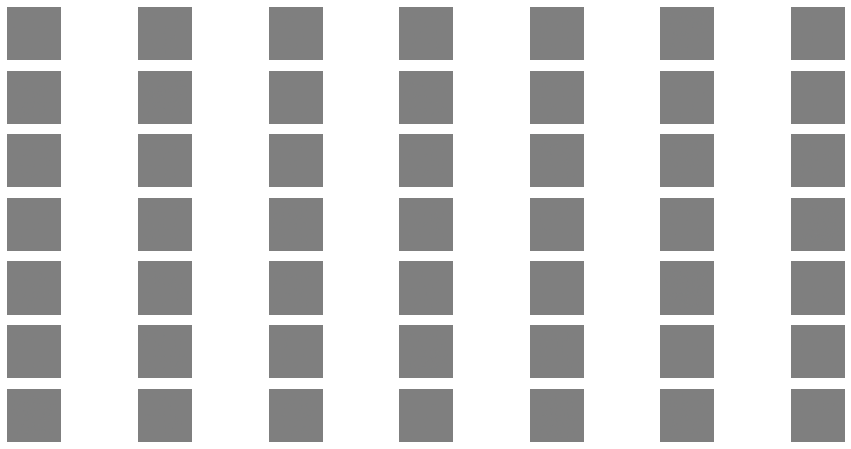

In [22]:
n_samples = 49

def showFake(g_model, latent_dim, n_samples):
    plt.figure(figsize=(16,8))
    X, _ = gen_fakeGenSamples(g_model, latent_dim, n_samples)
    
    X = (X + 1)/2
    
    for i in range(n_samples):
        plt.subplot(7 ,7 ,1+i)
        plt.axis('off')
        plt.imshow(X[i])
        
showFake(g_model, latent_dim, 49)

In [23]:
def define_gan(g_model, d_model):
    d_model.trainable = False
    inputs = g_model.input
    x = g_model(inputs)
    outputs = d_model(x)
    
    model = keras.Model(inputs=inputs, outputs=outputs, name= 'OrchidGAN')
    model.compile(
        loss=keras.losses.BinaryCrossentropy(),
        optimizer=keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
    )
    
    return model

In [24]:
gan_model = define_gan(g_model, d_model)
gan_model.summary()

Model: "OrchidGAN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
Orchid_GAN_generator (Functi (None, 64, 64, 3)         1523587   
_________________________________________________________________
OrchidGAN_discriminator (Fun (None, 1)                 534785    
Total params: 2,058,372
Trainable params: 1,523,587
Non-trainable params: 534,785
_________________________________________________________________


In [25]:
def train_gan(gan_model, latent_dim, n_epochs=128, n_batch=128):
    for i in range(n_epochs):
        x_gan = gen_latent_points(latent_dim, n_batch)
        y_gan = np.ones((n_batch, 1))
        gan_model.train_on_batch(x_gan, y_gan)

In [26]:
train_gan(gan_model, latent_dim)

In [27]:
tmp = gen_latent_points(latent_dim, n_samples)
tmp
gan_model.predict(tmp)

array([[0.99997795],
       [0.99999416],
       [0.9999927 ],
       [0.9999918 ],
       [0.99999   ],
       [0.99998724],
       [0.9999566 ],
       [0.9999949 ],
       [0.99997187],
       [0.9999882 ],
       [0.9999633 ],
       [0.9999981 ],
       [0.99999774],
       [0.9999223 ],
       [0.9999924 ],
       [0.99999285],
       [0.9999864 ],
       [0.9999628 ],
       [0.999992  ],
       [0.9999877 ],
       [0.9999988 ],
       [0.9999914 ],
       [0.99998903],
       [0.99998057],
       [0.9999937 ],
       [0.99999475],
       [0.9999807 ],
       [0.9999094 ],
       [0.9999677 ],
       [0.9999974 ],
       [0.9999136 ],
       [0.99999464],
       [0.99972683],
       [0.99997723],
       [0.99995005],
       [0.9999838 ],
       [0.99999   ],
       [0.9999478 ],
       [0.99993706],
       [0.9999778 ],
       [0.9999875 ],
       [0.9999901 ],
       [0.9999536 ],
       [0.99998295],
       [0.99999785],
       [0.99999416],
       [0.9999938 ],
       [0.999

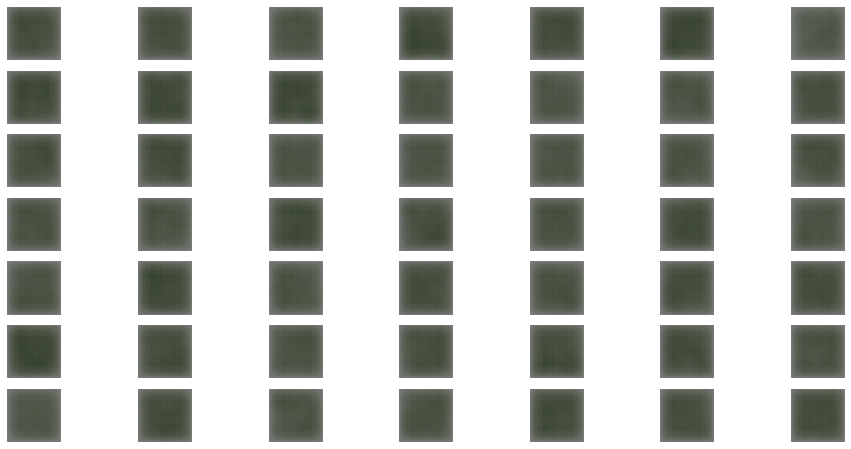

In [28]:
showFake(g_model, latent_dim, n_samples)

In [35]:
_dir = 'output'

def save_plot(examples, epoch, n=7):
    plt.figure(figsize=(16,8))
    examples = ( examples + 1 )/ 2.0
    for i in range(n*n):
        plt.subplot(n,n,1+i)
        plt.axis('off')
        plt.imshow(examples[i])
    
    filename = _dir + '/plots/generated_plot_%03d.png' %(epoch+1)
    plt.savefig(filename,dpi=72)
    plt.close()
    
def summarize_performance(epoch, g_model, d_model, datagen, latent_dim, n_samples=150):
    X_real, y_real = datagen(n_samples)
    _, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
    
    x_fake, y_fake = gen_fakeGenSamples(g_model, latent_dim, n_samples)
    _, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
    
    print('>>> Accuracy real : %f, fake: %f' % (acc_real*100, acc_fake*100))
    save_plot(x_fake, epoch)
    filename = _dir + '/plots/generator_model_%03d.h5' %(epoch+1)
    g_model.save(filename)
    
def train(g_model, d_model,gan_model, datagen, latent_dim, n_epoch = 10, n_batch=128):
    bat_per_epo = 390
    half_batch = int(n_batch/2)
    
    for i in range(n_epoch):
        for j in range(bat_per_epo):
            X_real, y_real = datagen(half_batch)
            d_loss1, _ = d_model.train_on_batch(X_real, y_real)
            X_fake, y_fake = gen_fakeGenSamples(g_model, latent_dim, half_batch)
            d_loss2, _ = d_model.train_on_batch(X_fake, y_fake)
            X_gan = gen_latent_points(latent_dim, n_batch)
            y_gan = np.ones((n_batch,1))
            g_loss = gan_model.train_on_batch(X_gan, y_gan)
        print('>>> %d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' % (i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))
        if (i+1) % 10 == 0 or i ==1 :
            summarize_performance(i, g_model, d_model, gen_resamples, latent_dim)
    

In [33]:
train(g_model, d_model, gan_model, gen_resamples, latent_dim)

>>> 1, 390/390, d1=0.606, d2=0.803 g=2.785
>>> 2, 390/390, d1=0.695, d2=0.707 g=1.628


TypeError: 'ImageDataGenerator' object is not callable

In [ ]:
showFake(g_model, latent_dim, n_samples)

In [34]:
summarize_performance(0, g_model, d_model, gen_resamples, latent_dim)

>>> Accuracy real : 63.333333, fake: 71.333331
